In [ ]:
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus

# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])

# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# pridėkite naują stulplelį, kur būtų tik įvykio valanda
# Vizualizuokite, kuriuo paros laiku, kurią valandą įvyksta daugiausiai eismo įvykių

# sekantiems klausimams patys sugalvojate tinkamiausias vizualizacijas
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį?
#  koks vidutinis kaltininkų amžius?
# Kokiomis baudų rūšimis buvo nubausti vyrai/moterys (administracinė, baudžiamoji) (teisenosStadijaBusena)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
df = pd.read_json('../../DATA/ei_2023_12_31.json')
df.head(1)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."


In [3]:
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])

In [ ]:
ivykiovalanda=[]
for i in df['dataLaikas']:
    ivykiovalanda.append(i.hour)

In [30]:
paroslaikas=[]
for i in ivykiovalanda:
    if 0<=i< 6:
        paroslaikas.append('naktis')
    if 6 <= i <=12:
        paroslaikas.append('rytas')
    if 12 < i < 18:
        paroslaikas.append('diena')
    if 18<= i <= 24:
        paroslaikas.append('vakaras')

In [32]:
df['parosLaikas']=paroslaikas
df['ivykioValanda']=ivykiovalanda

{'rytas': 7576, 'diena': 7465, 'vakaras': 7413, 'naktis': 1786}


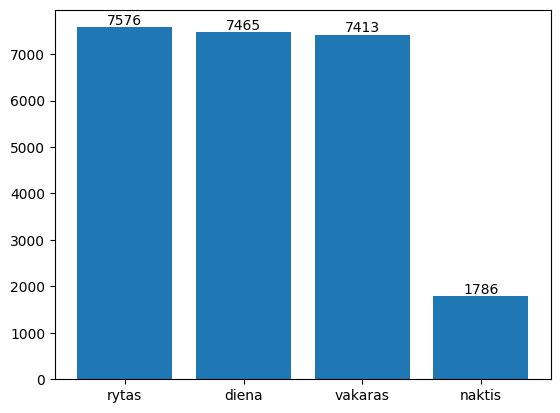

In [34]:
laikusarasas=list(set(paroslaikas))
tadam={}
for i in laikusarasas:
    tadam[i]=0

for i in paroslaikas:
        tadam[i]=tadam[i]+1
        
print(tadam)

fig, axis = plt.subplots()

a=axis.bar(tadam.keys(), tadam.values())
axis.bar_label(a)

plt.show()

{0: 518, 1: 323, 2: 243, 3: 196, 4: 202, 5: 304, 6: 599, 7: 1378, 8: 1176, 9: 1010, 10: 1045, 11: 1075, 12: 1293, 13: 1228, 14: 1275, 15: 1275, 16: 1636, 17: 2051, 18: 1698, 19: 1462, 20: 1225, 21: 1126, 22: 1129, 23: 773}


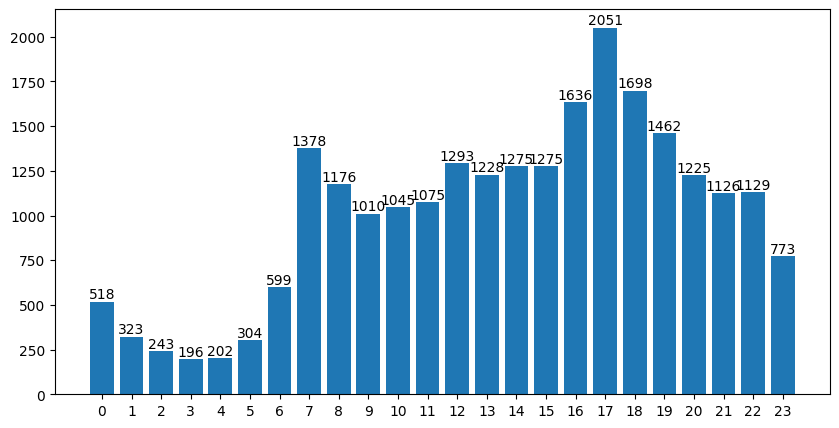

In [45]:
laikusarasas=list(set(ivykiovalanda))
tadam={}
for i in laikusarasas:
    tadam[i]=0

for i in ivykiovalanda:
        tadam[i]=tadam[i]+1
        
print(tadam)

fig, axis = plt.subplots(figsize=(10, 5))

a=axis.bar(tadam.keys(), tadam.values())
axis.bar_label(a)
axis.set_xticks(list(tadam.keys()))
plt.show()

In [67]:
print(df['eismoDalyviai'][0][0])

{'dalyvisId': 48690423, 'kategorija': 'Kiti', 'dalyvioTipas': 'Kitas asmuo', 'pasisalino': 'Ne', 'asmuoNezinomas': 'Ne', 'lytis': 'Vyras', 'pilietybe': None, 'amzius': 50, 'neigalumas': 'Ne', 'saugosDirzas': None, 'vaikoKedesNaudojimas': None, 'saugosSalmoNaudojimas': None, 'oroPagalves': None, 'bukle': 'Nenukentėjo', 'detaliBukle': None, 'suzalojimoMastas': None, 'vairuotojoKvalifikacija': None, 'vairavimoStazas': None, 'busena': 'Blaivus', 'detaliBusena': None, 'papBusena': None, 'detaliPapBusena': None, 'kaltininkas': 'Taip', 'girtumasPromilemis': None, 'dalyvioBusena': 'KALTININKAS', 'teisenosStadijaBusena': 'ADMINISTRACINIS', 'dalyvioKetPazeidimai': ['Kiti Kelių eismo taisyklių pažeidimai'], 'tpId': None}


In [56]:
motSkaicius=0
vyrSkaicius=0

for i in df['eismoDalyviai']:
    for j in i:
        if j['kaltininkas']== 'Taip':
            if j['lytis'] == 'Vyras':
                vyrSkaicius = vyrSkaicius+1
            if j['lytis']== 'Moteris':
                motSkaicius = motSkaicius+1

print(motSkaicius)
print(vyrSkaicius)

2889
9173


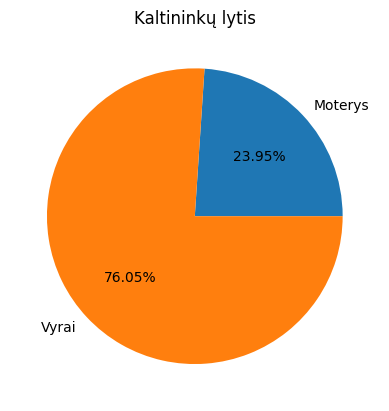

In [58]:
kaltininkulytis=[]
kaltininkulytis.append(motSkaicius)
kaltininkulytis.append(vyrSkaicius)

lytys=['Moterys', 'Vyrai']

plt.pie(x = kaltininkulytis, labels = lytys, autopct='%.2f%%')
plt.title('Kaltininkų lytis')
plt.show()

In [66]:
amzius=[]
for i in df['eismoDalyviai']:
    for j in i:
        if j['kaltininkas']== 'Taip' and j['amzius'] != None:
            amzius.append(j['amzius'])
            
print(np.mean(amzius))
            

42.61015967568462


In [81]:
vyrubausmes=[]
moterubausmes=[]
for i in df['eismoDalyviai']:
    for j in i:
        if j['lytis']== 'Vyras' and j['teisenosStadijaBusena'] != None:
            vyrubausmes.append(j['teisenosStadijaBusena'])
        
        if j['lytis']== 'Moteris'and j['teisenosStadijaBusena'] != None:
            moterubausmes.append(j['teisenosStadijaBusena'])

bausmiutipas=list(set(vyrubausmes))

moterutipokiekis=[0, 0]
vyrutipokiekis=[0, 0]

for i in vyrubausmes:
    if i == bausmiutipas[0]:
        vyrutipokiekis[0]=vyrutipokiekis[0]+1
    else:
        vyrutipokiekis[1]=vyrutipokiekis[1]+1

for i in moterubausmes:
    if i == bausmiutipas[0]:
        moterutipokiekis[0]=moterutipokiekis[0]+1
    else:
        moterutipokiekis[1]=moterutipokiekis[1]+1

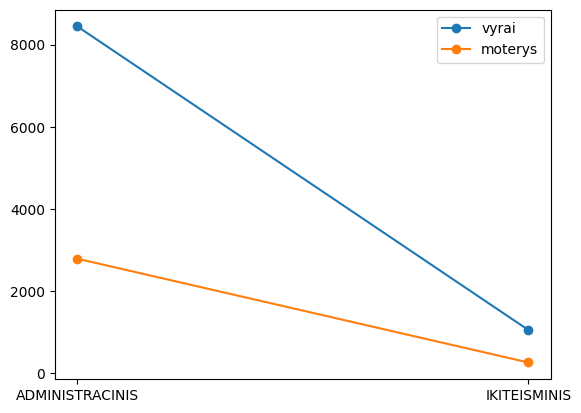

In [85]:
fig, axis = plt.subplots()


    
axis.plot(bausmiutipas, vyrutipokiekis, label = 'vyrai', marker ='o')
axis.plot(bausmiutipas, moterutipokiekis, label = 'moterys', marker ='o')
axis.set_xticks(bausmiutipas)
axis.legend(loc='best')
plt.show()